## IHDP

In [1]:
from sklearn.model_selection import train_test_split, cross_val_score # to split the data into train and test datasets 
from sklearn.preprocessing import StandardScaler # use of StandardScaler to standarise the dataset
import numpy as np # library of mathematical operations
import pandas as pd  # for data anlysis and manipulation
import matplotlib.pyplot as plt # to display charts
import seaborn as sns # data visualisation library
from econml.metalearners import XLearner # advanced CATE estimator
from sklearn.model_selection import GridSearchCV # library function for cross-validation
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier # meta estimator for fitting decision trees

from helper_functions import feat_imp, get_ps_weights, pehe # self-defined funtions 

### Loading the dataset

In [2]:
# to load the dataset
ihdp = pd.read_csv("https://raw.githubusercontent.com/dmachlanski/CE888_2022/main/project/data/ihdp.csv", delimiter=",")
ihdp

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,...,x20,x21,x22,x23,x24,x25,t,yf,ycf,ite
0,1.397395,0.996346,-1.105624,-0.879606,0.308569,-1.023402,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,4.771232,-0.298509,4.657928
1,0.269033,0.196818,0.383828,0.161703,-0.629189,1.460832,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.956273,5.783770,3.428604
2,1.051537,1.795874,-1.105624,0.161703,-0.629189,0.963985,1.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4.164164,7.055789,3.658195
3,0.662446,0.196818,-0.733261,-0.879606,0.371086,-0.692171,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,6.172307,1.379697,4.585505
4,0.856992,1.795874,0.011465,-0.879606,0.558638,0.301522,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,7.834469,2.747986,4.265591
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
742,-1.853672,-2.201766,1.500917,0.161703,-0.129052,-1.023402,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2.244050,5.269701,4.598246
743,-1.066845,-1.402238,1.128554,2.244320,0.371086,2.288910,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,6.253175,8.393338,0.940855
744,-1.045229,-1.337276,1.128554,-0.879606,0.683672,0.301522,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.908235,6.897207,4.373736
745,-0.115735,-0.602710,-1.105624,2.244320,0.558638,2.785756,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,8.324520,9.208251,0.352653


### Exploring the dataset

In [3]:
# to print information about the dataset
ihdp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 747 entries, 0 to 746
Data columns (total 29 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      747 non-null    float64
 1   x2      747 non-null    float64
 2   x3      747 non-null    float64
 3   x4      747 non-null    float64
 4   x5      747 non-null    float64
 5   x6      747 non-null    float64
 6   x7      747 non-null    float64
 7   x8      747 non-null    float64
 8   x9      747 non-null    float64
 9   x10     747 non-null    float64
 10  x11     747 non-null    float64
 11  x12     747 non-null    float64
 12  x13     747 non-null    float64
 13  x14     747 non-null    float64
 14  x15     747 non-null    float64
 15  x16     747 non-null    float64
 16  x17     747 non-null    float64
 17  x18     747 non-null    float64
 18  x19     747 non-null    float64
 19  x20     747 non-null    float64
 20  x21     747 non-null    float64
 21  x22     747 non-null    float64
 22  x2

In [4]:
nrow, ncol = ihdp.shape
print(f'There are {nrow} rows and {ncol} columns')

There are 747 rows and 29 columns


In [13]:
ihdp['t'].value_counts(1)

0.0    0.813922
1.0    0.186078
Name: t, dtype: float64

In [7]:
X = ihdp[["x1", 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10',
         'x11', 'x12', 'x13', 'x14', 'x15', 'x16', 'x17', 'x18', 
         'x19', 'x20', 'x21', 'x22', 'x23', 'x24', 'x25' ]].copy()

In [8]:
# reshaping the single dimension vectors into 2D vectors as some methods prefer this representaion of data
T = ihdp['t'].values.reshape(-1, 1)
Y = ihdp['yf'].values.reshape(-1, 1)
ite = ihdp['ite']

<AxesSubplot:>

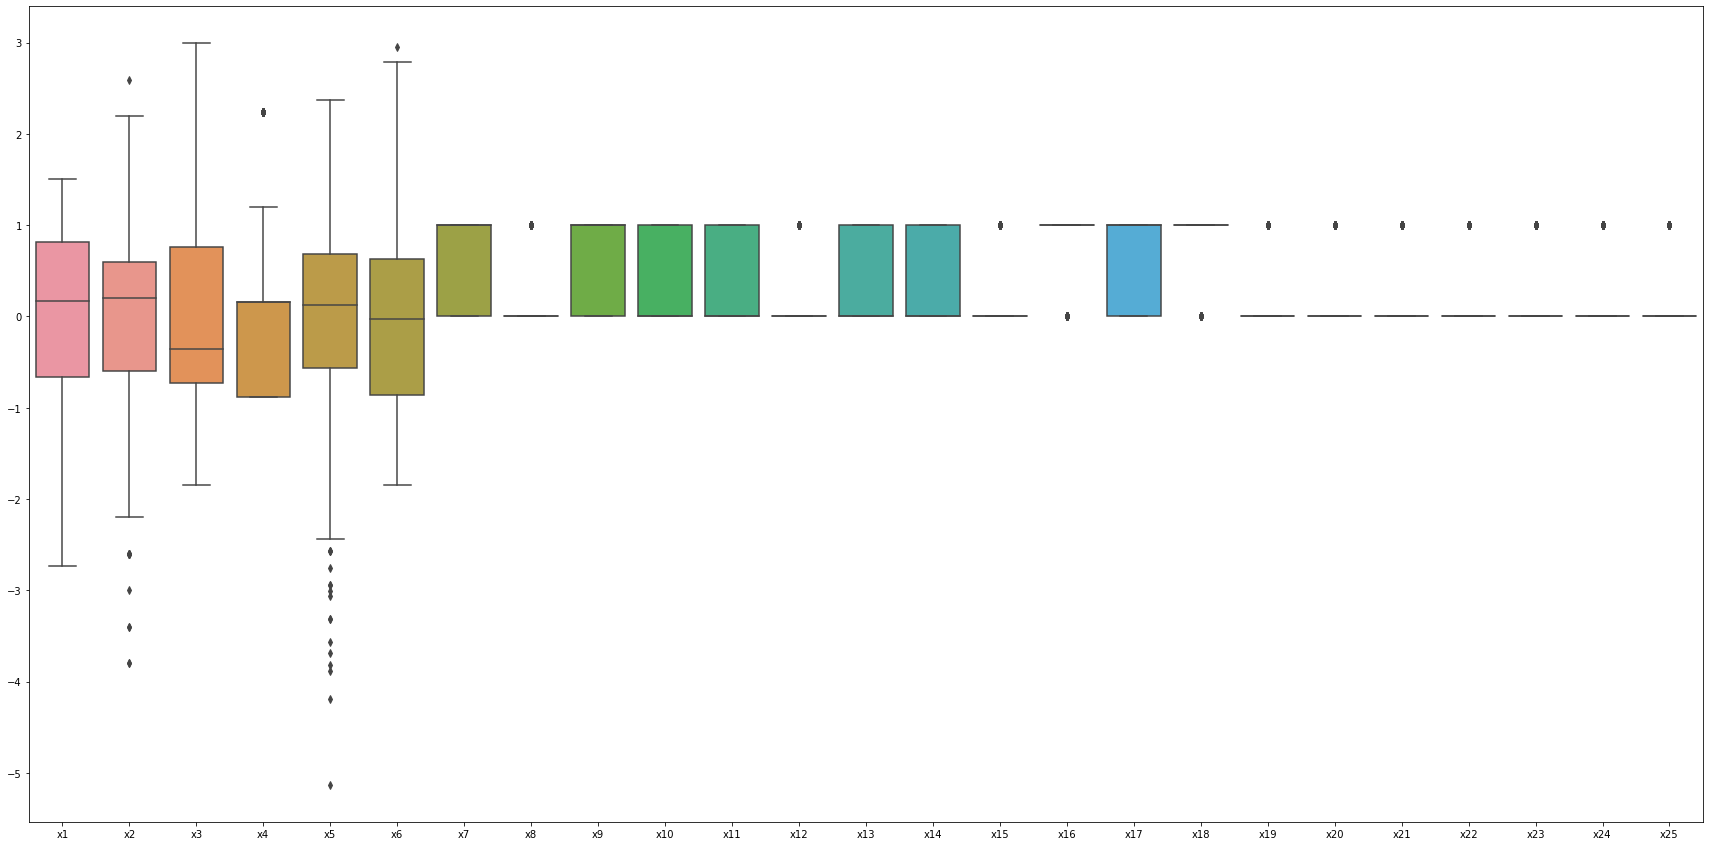

In [9]:
# to plot a boxplot of each feature in the dataset and check if the features vary in scale
plt.figure(figsize=(30,15))
sns.boxplot(data = X)

In [ ]:
plt.savefig("ihdp_boxplot.pdf")

array([[<AxesSubplot:title={'center':'x1'}>,
        <AxesSubplot:title={'center':'x2'}>,
        <AxesSubplot:title={'center':'x3'}>,
        <AxesSubplot:title={'center':'x4'}>,
        <AxesSubplot:title={'center':'x5'}>],
       [<AxesSubplot:title={'center':'x6'}>,
        <AxesSubplot:title={'center':'x7'}>,
        <AxesSubplot:title={'center':'x8'}>,
        <AxesSubplot:title={'center':'x9'}>,
        <AxesSubplot:title={'center':'x10'}>],
       [<AxesSubplot:title={'center':'x11'}>,
        <AxesSubplot:title={'center':'x12'}>,
        <AxesSubplot:title={'center':'x13'}>,
        <AxesSubplot:title={'center':'x14'}>,
        <AxesSubplot:title={'center':'x15'}>],
       [<AxesSubplot:title={'center':'x16'}>,
        <AxesSubplot:title={'center':'x17'}>,
        <AxesSubplot:title={'center':'x18'}>,
        <AxesSubplot:title={'center':'x19'}>,
        <AxesSubplot:title={'center':'x20'}>],
       [<AxesSubplot:title={'center':'x21'}>,
        <AxesSubplot:title={'center':'x

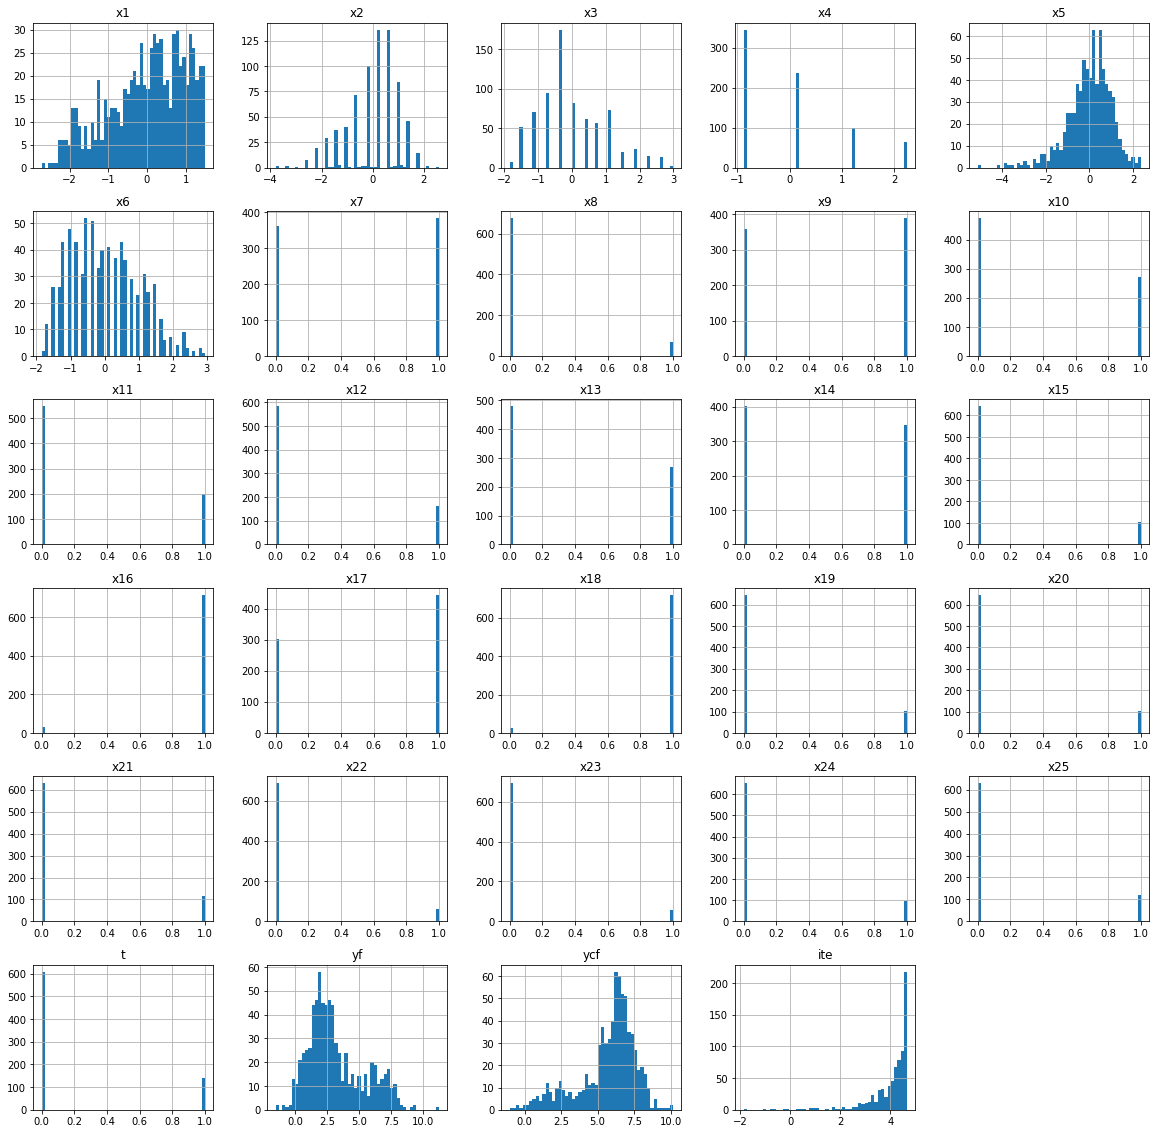

In [10]:
# to draw histogram and look at the distribution of values of each feature
ihdp.hist(bins=50, figsize=(20,20))

In [11]:
plt.savefig("ihdp_histogram.pdf")

<Figure size 432x288 with 0 Axes>

<AxesSubplot:>

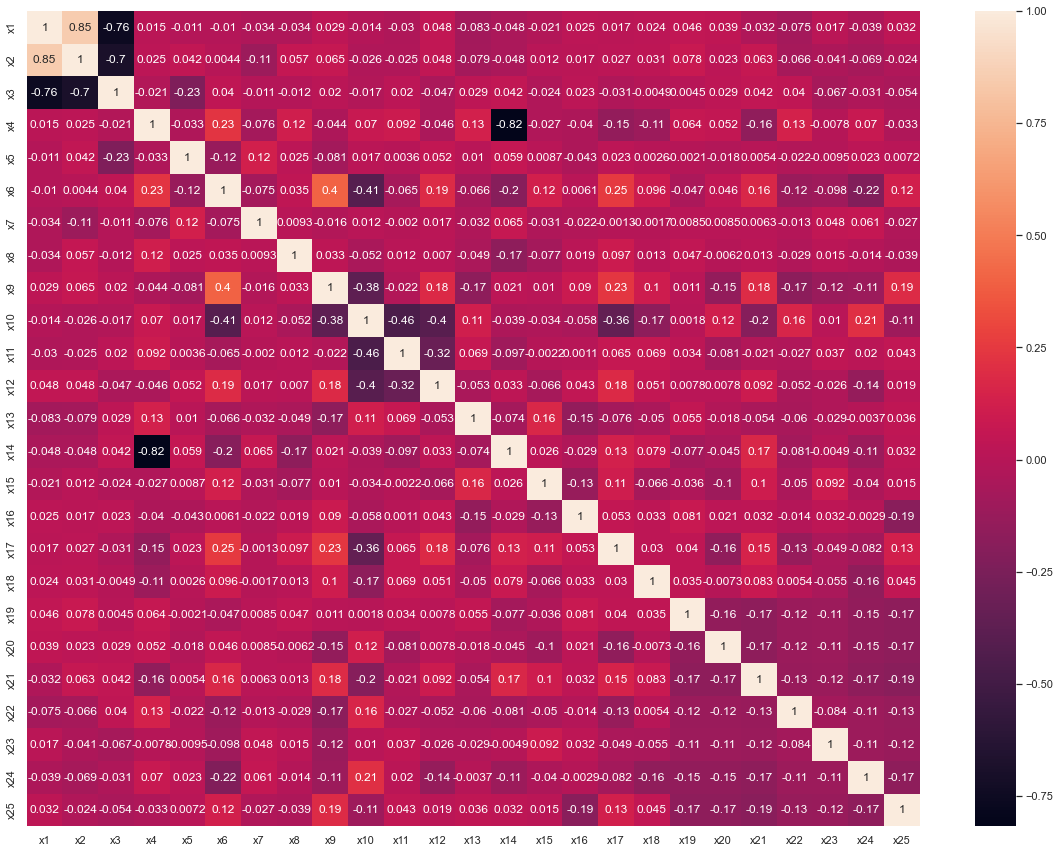

In [15]:
# to calculate the correlations between each pair of variables
cor = X.corr()

# to plot a heatmap of the correlations between pairs of features
sns.set(rc = {'figure.figsize':(20,15)})
sns.heatmap(cor, annot = True)

In [ ]:
plt.savefig("ihdp_heatmap.pdf")

### Data pre-processing

In [16]:
# to split the data into train and test datasets
train_set, test_set = train_test_split(ihdp, test_size=0.2, random_state=50)  
print(len(train_set), len(test_set))

597 150


In [17]:
x_train = train_set.drop(['t', 'yf', 'ycf', 'ite'], axis = 1)
x_test = test_set.drop(['t', 'yf', 'ycf', 'ite'], axis = 1)

In [18]:
y_train = train_set['yf']
y_test = test_set['yf']

In [19]:
t_train = train_set['t']
t_test = test_set['t']

In [20]:
ite_train = train_set['ite']
ite_test = test_set['ite']

In [21]:
# to standarise the dataset i.e. mean = 0 and s.d. = 1
scaler_x = StandardScaler() 
x_train = scaler_x.fit_transform(x_train)
x_test = scaler_x.transform(x_test)

In [22]:
x_train = pd.DataFrame(x_train)
t_train = pd.DataFrame(t_train)

In [23]:
x_test = pd.DataFrame(x_test)
t_test = pd.DataFrame(t_test)

### Modelling

#### Simple learners

In [24]:
# to fit a simple Random Forest regression model
reg = RandomForestRegressor() 

In [25]:
scores = cross_val_score(reg, x_train, y_train, cv=10, scoring = "neg_mean_squared_error")
print("Negative mean squared error: %.2f +/- %.2f" % (scores.mean(), scores.std()))

Negative mean squared error: -3.63 +/- 0.85


In [26]:
param_grid = { 
    'n_estimators': [25,50,100,150],
    'max_depth' : [3,4,5,6,7,8],
}

In [27]:
# for hyperparameter tuning
CV_reg = GridSearchCV(estimator=reg, param_grid=param_grid, cv= 10) 
CV_reg.fit(x_train, y_train)

GridSearchCV(cv=10, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [3, 4, 5, 6, 7, 8],
                         'n_estimators': [25, 50, 100, 150]})

In [28]:
# to find the best suited parameters for the regression model
CV_reg.best_params_ 

{'max_depth': 4, 'n_estimators': 50}

In [29]:
simple_reg = RandomForestRegressor(n_estimators = 100, max_depth = 6)

In [30]:
xt_train = np.concatenate([x_train, t_train], axis=1) # to merge x and t

# to build the model on the traing data
simple_reg.fit(xt_train, y_train) 

RandomForestRegressor(max_depth=6)

In [31]:
scores = cross_val_score(simple_reg, xt_train, y_train, cv = 10, scoring = "neg_mean_squared_error")
print("Negative mean squared error: %.2f +/- %.2f" % (scores.mean(), scores.std()))

Negative mean squared error: -1.17 +/- 0.26


In [32]:
# to merge x and t = 0
xt0_test = np.concatenate([x_test, np.zeros_like(t_test)], axis=1) 

# to predict y based on features and no treatmnent effects
simple_reg_y0_test = simple_reg.predict(xt0_test)

In [33]:
# to merge x and t = 1
xt1_test = np.concatenate([x_test, np.ones_like(t_test)], axis=1) 

# to predict y based on features and treatmnent effects
simple_reg_y1_test = simple_reg.predict(xt1_test)

In [34]:
# to compute ITEs
simple_reg_te_test = simple_reg_y1_test - simple_reg_y0_test 

In [35]:
# to use the pre-defined 'pehe' function
pehe_test = pehe(ite_test, simple_reg_te_test)

In [36]:
results = []
results.append(['Simple Learner', pehe_test])

cols = ['Method', 'PEHE test']

df = pd.DataFrame(results, columns=cols)
df

,Method,PEHE test
0,Simple Learner,0.493678


In [37]:
# to plot feature importance by calling pre-defined function
importances, indices = feat_imp(simple_reg)

In [38]:
names = ihdp.drop(['yf', 'ycf', 'ite'], axis=1).columns.values

In [39]:
# to print the feature ranking
print("Feature ranking:")
for f in range(x_train.shape[1]):
    print("%d. %s (%f)" % (f + 1, indices[f],  importances[indices[f]]))

Feature ranking:
1. 25 (0.593039)
2. 5 (0.280314)
3. 14 (0.033206)
4. 0 (0.021510)
5. 3 (0.017036)
6. 4 (0.012352)
7. 2 (0.008757)
8. 1 (0.007965)
9. 6 (0.002938)
10. 10 (0.002319)
11. 12 (0.002312)
12. 11 (0.002127)
13. 24 (0.001979)
14. 15 (0.001847)
15. 23 (0.001503)
16. 7 (0.001457)
17. 16 (0.001399)
18. 20 (0.001351)
19. 9 (0.001220)
20. 13 (0.001207)
21. 8 (0.001183)
22. 18 (0.001054)
23. 17 (0.000685)
24. 19 (0.000636)
25. 21 (0.000383)


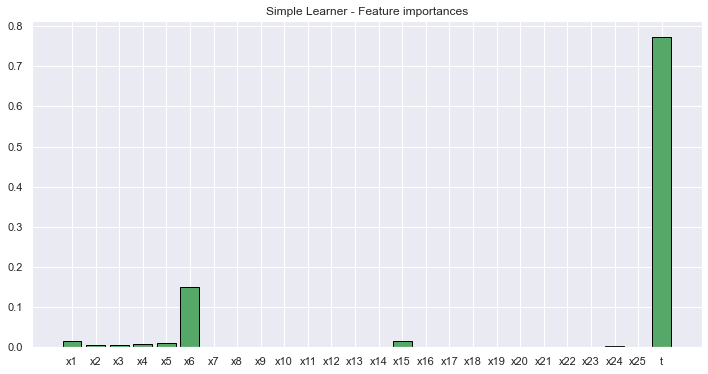

In [81]:
# to plot the feature importances of the forest
plt.rcParams["figure.figsize"] = (12, 6)
plt.title("Simple Learner - Feature importances")
plt.bar(names,importances, color="g", edgecolor="black")

#### Propensity score re-weighting

In [41]:
# to train a classifier to predict propensity scores
prop_clf = RandomForestClassifier()

In [42]:
scores = cross_val_score(prop_clf, x_train, t_train['t'], cv=10, scoring = "f1")
print("f1 score: %.2f" % (scores.mean()))

f1 score: 0.03


In [43]:
param_grid = { 
    'n_estimators': [15, 20, 25, 50, 100],
    'max_depth' : [2, 3, 4, 5, 6],
}

In [44]:
# for hyperparameter tuning
CV1_model = GridSearchCV(estimator=prop_clf, param_grid=param_grid, cv= 10)
CV1_model.fit(x_train, t_train['t'])

GridSearchCV(cv=10, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [2, 3, 4, 5, 6],
                         'n_estimators': [15, 20, 25, 50, 100]})

In [45]:
# to find the best suited parameters for the classification model
CV1_model.best_params_

{'max_depth': 2, 'n_estimators': 15}

In [46]:
prop = RandomForestClassifier(n_estimators = 20, max_depth = 5)

In [47]:
scores = cross_val_score(prop, x_train, t_train['t'], cv=10, scoring = "f1")
print("f1 score: %.2f" % (scores.mean()))

f1 score: 0.00


In [48]:
# to get the sample weights
weights = get_ps_weights(prop, x_train, t_train)

In [49]:
# to build a Random Forest regression model
model = RandomForestRegressor()

In [50]:
scores = cross_val_score(model, x_train, y_train, cv=10, scoring = "neg_mean_squared_error")
print("Negative mean squared error: %.2f +/- %.2f" % (scores.mean(), scores.std()))

Negative mean squared error: -3.57 +/- 0.83


In [51]:
param_grid_ = { 
    'n_estimators': [25, 50, 100, 150, 200],
    'max_depth' : [4, 5, 6, 7, 8, 9, 10, 11, 12],
}

In [52]:
# for hyperparameter tuning
CV_model = GridSearchCV(estimator=model, param_grid=param_grid_, cv= 10)
CV_model.fit(x_train, y_train)

GridSearchCV(cv=10, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [4, 5, 6, 7, 8, 9, 10, 11, 12],
                         'n_estimators': [25, 50, 100, 150, 200]})

In [53]:
# to find the best suited parameters for the classification model
CV_model.best_params_

{'max_depth': 5, 'n_estimators': 100}

In [54]:
# to train the regressor based on the propensity model
ipsw = RandomForestRegressor(n_estimators = 200, max_depth = 5)
ipsw.fit(xt_train, y_train, sample_weight= weights)

RandomForestRegressor(max_depth=5, n_estimators=200)

In [55]:
scores = cross_val_score(ipsw, x_train, y_train, cv=10, scoring = "neg_mean_squared_error")
print("Negative mean squared error: %.2f +/- %.2f" % (scores.mean(), scores.std()))

Negative mean squared error: -3.49 +/- 0.88


In [56]:
# to make predictions
ipsw_y0_test = ipsw.predict(np.concatenate([x_test, np.zeros_like(t_test)], axis=1))
ipsw_y1_test = ipsw.predict(np.concatenate([x_test, np.ones_like(t_test)], axis=1))

In [57]:
# to compute ITEs
ipsw_te_test = ipsw_y1_test - ipsw_y0_test

In [58]:
# to use the pre-defined 'pehe' function
ipsw_pehe_test = pehe(ite_test, ipsw_te_test)

In [59]:
results = []
results.append(['IPSW', ipsw_pehe_test])

cols = ['Method', 'PEHE test']

df = pd.DataFrame(results, columns=cols)
df

,Method,PEHE test
0,IPSW,0.440312


In [60]:
# to plot feature importance by calling pre-defined function
importances, indices = feat_imp(ipsw)

In [61]:
# to print the feature ranking
print("Feature ranking:")
for f in range(x_train.shape[1]):
    print("%d. %s (%f)" % (f + 1, indices[f],  importances[indices[f]]))

Feature ranking:
1. 25 (0.773497)
2. 5 (0.149512)
3. 0 (0.016039)
4. 14 (0.015313)
5. 4 (0.011064)
6. 3 (0.007391)
7. 1 (0.005482)
8. 2 (0.005139)
9. 23 (0.002145)
10. 10 (0.001922)
11. 12 (0.001770)
12. 7 (0.001730)
13. 6 (0.001410)
14. 11 (0.001298)
15. 8 (0.000867)
16. 15 (0.000766)
17. 13 (0.000764)
18. 16 (0.000684)
19. 24 (0.000681)
20. 18 (0.000628)
21. 20 (0.000520)
22. 21 (0.000459)
23. 9 (0.000368)
24. 17 (0.000346)
25. 19 (0.000148)


<BarContainer object of 26 artists>

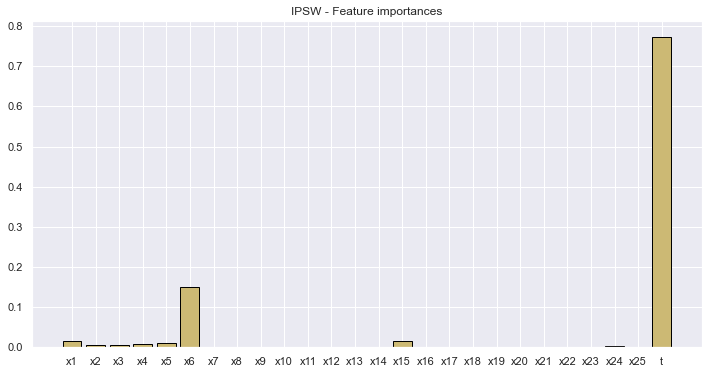

In [62]:
# to plot the feature importances of the forest
plt.rcParams["figure.figsize"] = (12, 6)
plt.title("IPSW - Feature importances")
plt.bar(names,importances, color="y", edgecolor="black")

#### Advanced CATE estimators

In [63]:
# to implement Random Forest a cross-validation regression model that automatically chooses the hyperparameters
first_stage = GridSearchCV(
                estimator=RandomForestRegressor(),
                param_grid={
                        'max_depth': [3, 4, 5, 6, 7],
                        'n_estimators': (50, 100, 150, 200)
                    }, cv=10, n_jobs=-1, scoring='neg_mean_squared_error'
                )
mod_y = first_stage.fit(x_train, y_train).best_estimator_

In [64]:
# to implement Random Forest a cross-validation classification model that automatically chooses the hyperparameters
first_stage0 = GridSearchCV(
                estimator=RandomForestClassifier(),
                param_grid={
                        'max_depth': [3, 4, 5, 6, 7],
                        'n_estimators': (50, 100, 150, 200)
                    }, cv=10, n_jobs=-1, scoring='f1'
                )
mod_y0 = first_stage0.fit(x_train, t_train['t']).best_estimator_

In [65]:
# to instantiate X learner
X_learner = XLearner(models=mod_y, propensity_model=mod_y0)

In [66]:
# to train X_learner on the train set
X_learner.fit(y_train, t_train['t'], X=x_train)

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.


In [67]:
# to estimate treatment effects on test data
x_estimate = X_learner.effect(x_test)

In [68]:
# to use the pre-defined 'pehe' function
xl_pehe_test = pehe(ite_test,x_estimate)

In [69]:
results = []
results.append(['XL', xl_pehe_test])

col = ['Method', 'PEHE test']

df = pd.DataFrame(results, columns=col)
df

,Method,PEHE test
0,XL,0.323162


#### Results comparison

In [70]:
# to compare all the results
results = []
results.append(['Simple Learner', pehe_test])
results.append(['IPW', ipsw_pehe_test])
results.append(['XL', xl_pehe_test])

cols = ['Method', 'PEHE test']

df = pd.DataFrame(results, columns=cols)
df

,Method,PEHE test
0,Simple Learner,0.493678
1,IPW,0.440312
2,XL,0.323162
